<a href="https://colab.research.google.com/github/swathichatrathi/ADC-HACKATHON/blob/main/ADC_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
def parser(x):
  return pd.to_datetime(x)

different_chennai_reservoir_water_levels = pd.read_csv("chennai_reservoir_levels.csv.csv",)

total_water_levels = pd.read_csv('final_Reservior.csv', index_col = 0, parse_dates=[0], date_parser = parser)

In [ ]:
total_water_levels.shape

(5738, 1)

In [ ]:
total_water_levels.isna().sum()

Total    0
dtype: int64

In [ ]:
different_chennai_reservoir_water_levels.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [ ]:
different_chennai_reservoir_water_levels.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
5733,12-09-2019,15.0,0.0,0.0,0.0
5734,13-09-2019,15.0,0.0,0.0,0.0
5735,14-09-2019,15.0,0.0,0.0,0.0
5736,15-09-2019,15.0,0.0,0.0,0.0
5737,16-09-2019,15.0,0.0,0.0,0.0


In [ ]:
total_water_levels.head()

,Total
Date,
2004-01-01,271.9
2004-01-02,271.9
2004-01-03,270.9
2004-01-04,270.9
2004-01-05,270.8


In [ ]:
total_water_levels.tail()

,Total
Date,
2019-09-12,15.0
2019-09-13,15.0
2019-09-14,15.0
2019-09-15,15.0
2019-09-16,15.0


In [ ]:
total_water_levels.head()

,Total
Date,
2004-01-01,271.9
2004-01-02,271.9
2004-01-03,270.9
2004-01-04,270.9
2004-01-05,270.8


In [ ]:

total_water_levels.head()

,Total
Date,
2004-01-01,271.9
2004-01-02,271.9
2004-01-03,270.9
2004-01-04,270.9
2004-01-05,270.8


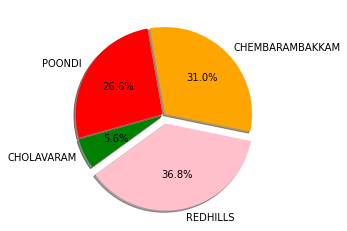

In [ ]:
poondi = pd.Series(different_chennai_reservoir_water_levels["POONDI"])
cholavaram = pd.Series(different_chennai_reservoir_water_levels["CHOLAVARAM"])
redhills = pd.Series(different_chennai_reservoir_water_levels["REDHILLS"])
chembarakkam = pd.Series(different_chennai_reservoir_water_levels["CHEMBARAMBAKKAM"])
labels=["POONDI", "CHOLAVARAM", "REDHILLS", "CHEMBARAMBAKKAM"]
dat = [poondi[:].mean(),cholavaram[:].mean(),redhills[:].mean(),chembarakkam[:].mean()]
plt.pie(dat,labels=labels,autopct='%1.1f%%',shadow=True,startangle=100,explode=(0.018, 0.018, 0.1, 0.018),colors=["red","green","pink","orange"])
plt.show()

In [ ]:
total_water_levels.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5738 entries, 2004-01-01 to 2019-09-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   5738 non-null   float64
dtypes: float64(1)
memory usage: 89.7 KB


In [ ]:
total_water_levels.isnull().sum()

Total    0
dtype: int64

In [ ]:
total_water_levels = pd.DataFrame(total_water_levels['Total'].resample('MS').sum())

In [ ]:
total_water_levels.head()

,Total
Date,
2004-01-01,7932.90
2004-02-01,5592.50
2004-03-01,5284.36
2004-04-01,5514.40
2004-05-01,4736.50


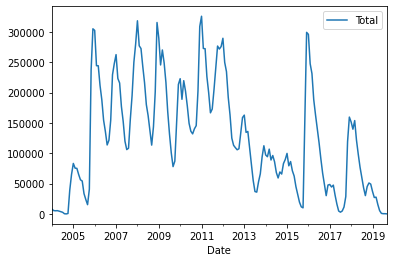

In [ ]:
total_water_levels.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

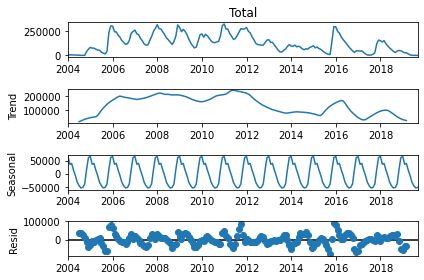

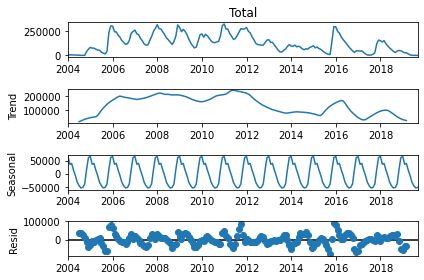

In [ ]:
result = seasonal_decompose(total_water_levels['Total'])
result.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(total_water_levels['Total'])
print("P value: ", res[1])

P value:  0.285103257648223


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip uninstall statsmodels


Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.13.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.13.2


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [ ]:

import warnings
warnings.filterwarnings("ignore")

Using the the auto arima model to get the appropriate values of p, d and q

In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(total_water_levels['Total'], start_p = 1, start_q = 1,
                          max_p = 10, max_q = 10, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True, 
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4101.362, Time=0.43 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4194.563, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4125.027, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4099.481, Time=0.34 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4161.350, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4101.469, Time=0.66 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4101.471, Time=0.83 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4118.309, Time=0.19 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4103.241, Time=1.00 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=4102.830, Time=0.40 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4103.689, Time=0.29 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=4104.400, Time=1.07 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=4101.222, Time=0.40 sec

Best model:  ARIMA(0,1,

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  189
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2046.741
Date:                            Wed, 28 Sep 2022   AIC                           4099.481
Time:                                    05:57:37   BIC                           4108.993
Sample:                                01-01-2004   HQIC                          4103.339
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3935      0.082      4.781      0.000       0.232       0.555
ma.S.L12      -0.8399      0.075    -11.190      0.000      -0.987      -0.693
sigma2      1.084e+09   5.23e-11   2.07e+19      0.000    1.08e+09    1.08e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               780.17
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             1.74
Prob(H) (two-sided):                  0.09   Kurtosis:                        12.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.49e+34. Standard errors may be unstable.
"""

Splitting the data into train and test data

In [ ]:
train = total_water_levels.iloc[:len(total_water_levels)-24]
test = total_water_levels.iloc[len(total_water_levels)-24:]
  
# Fit a SARIMAX(0, 1, 1)x(0, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Total'], 
                order = (0, 1, 1), 
                seasonal_order =(0, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Total   No. Observations:                  165
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1772.764
Date:                            Wed, 28 Sep 2022   AIC                           3551.528
Time:                                    05:57:37   BIC                           3560.600
Sample:                                01-01-2004   HQIC                          3555.213
                                     - 09-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3927      0.086      4.575      0.000       0.224       0.561
ma.S.L12      -0.8224      0.079    -10.390      0.000      -0.978      -0.667
sigma2      1.128e+09   5.37e-11    2.1e+19      0.000    1.13e+09    1.13e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               677.68
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             1.85
Prob(H) (two-sided):                  0.07   Kurtosis:                        12.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.51e+34. Standard errors may be unstable.
"""

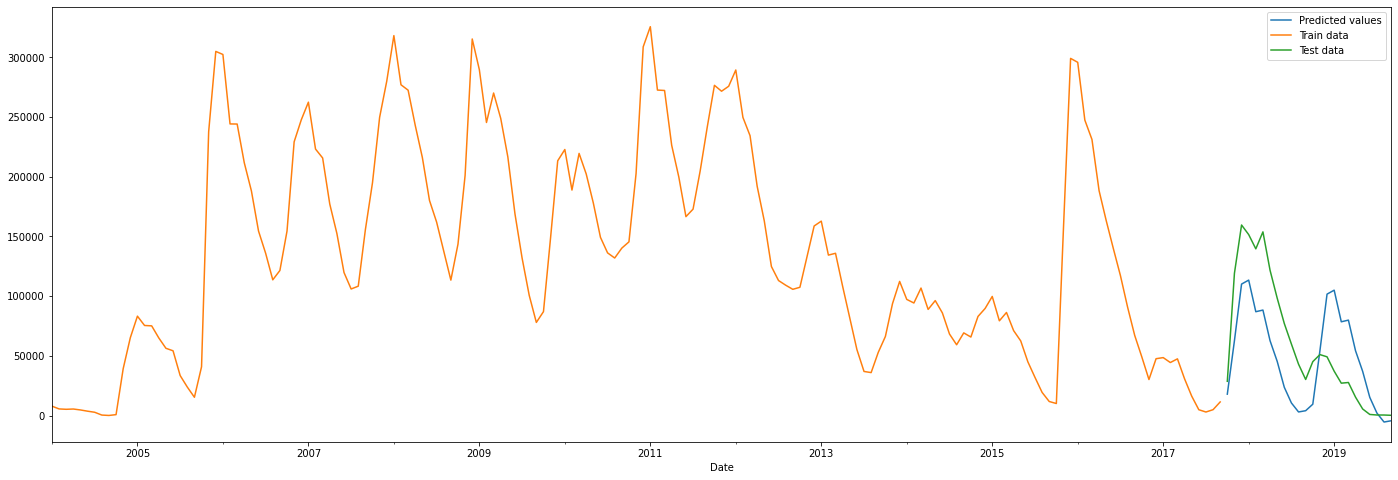

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'linear')

  
# plot predictions and actual values
predictions.plot(figsize = (24, 8), legend = True, label = "Predicted values")
train['Total'].plot(legend = True, label = "Train data")
test['Total'].plot(legend = True, label = "Test data")


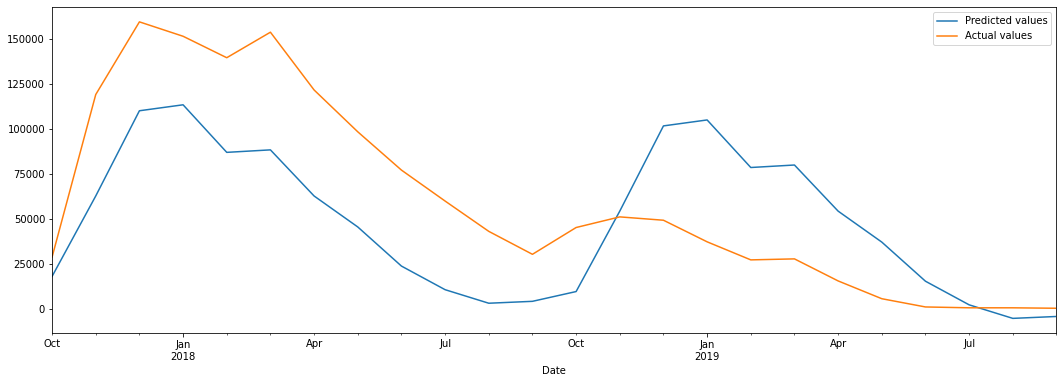

In [ ]:
predictions.plot(figsize = (18, 6), legend = True, label = "Predicted values")
test['Total'].plot(legend = True, label = "Actual values")


**Evaluating the model(accuracy)**

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test,predictions)
print(r2)

0.32843329154476886


As r2_score is greater than 0, it means that the model is able to predict the values with the help of past data. The model fits well for the data.


In [ ]:
from sklearn.metrics import mean_squared_log_error
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import minmax_scale

  
test_new = minmax_scale(test['Total'], feature_range=(0, 1))
predictions_new = minmax_scale(predictions, feature_range=(0, 1))
rmsle = np.sqrt(mean_squared_log_error(test_new, predictions_new))
print(rmsle)


0.2064717546911807


As RMSLE is closer to 0, the model is performing well.

**FORECASTING FUTURE VALUES**

Now, we use the entire data to train the model to predict the future water levels(for the next 12 months)

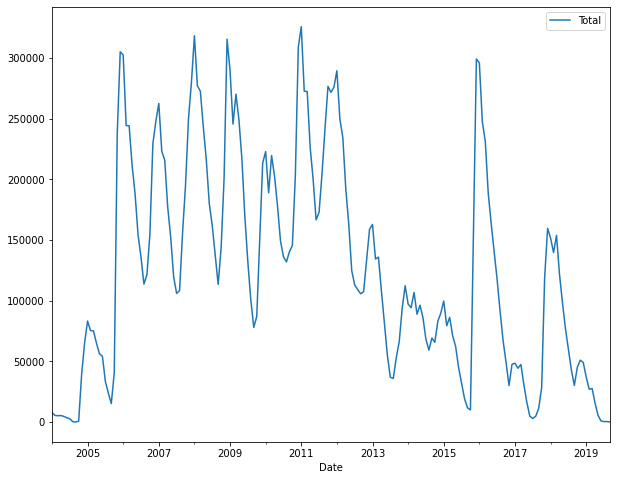

In [ ]:
model = SARIMAX(total_water_levels['Total'], 
                        order = (0, 1, 1), 
                        seasonal_order =(0, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 1 year
forecast = result.predict(start = len(total_water_levels), 
                          end = (len(total_water_levels)-1) + 1 * 12, 
                          typ = 'linear').rename('Forecast')
  
# Plot the forecast values
total_water_levels['Total'].plot(figsize = (10, 8), legend = True)
# forecast.plot(legend = True)

One thing to notice here is that. The performance of the model detoriates if we go for further periods of time as the error is also being propagated. The model performs well for short - term predictions.

In [ ]:

from datetime import datetime
from dateutil import relativedelta

# get two dates
d1 = '01/09/2019'
d2 = input("Enter Date (DD/MM/YYYY) - ")

# convert string to date object
start_date = datetime.strptime(d1, "%d/%m/%Y")
end_date = datetime.strptime(d2, "%d/%m/%Y")

# Get the relativedelta between two dates
delta = relativedelta.relativedelta(end_date, start_date)

# get months difference
res_months = delta.months + (delta.years * 12)

print(res_months)
start = len(total_water_levels)
end = (len(total_water_levels)) + res_months
print(start,end)
forecast_1 = result.predict(start = start, 
                          end = end, 
                          typ = 'linear').rename('Forecast')
print(forecast_1)
print(f"Predicted value at {d2} is {forecast_1[-1]} Million Cubic Feet(MCF)")